# Препроцессинг данных

## Загрузка данных в ноутбук

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../../Kaggle\xxx_submission.csv
../../Kaggle\xxx_test.csv
../../Kaggle\xxx_train.csv


In [2]:
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('../../Kaggle/xxx_train.csv')
test = pd.read_csv('../../Kaggle/xxx_test.csv')
# размеры данных
print(train.shape, test.shape)

(10000, 301) (50000, 300)


In [4]:
train.sample(5)

,X_0_0,X_0_1,X_0_2,X_1_0,X_1_1,X_1_2,X_2_0,X_2_1,X_2_2,X_3_0,X_3_1,X_3_2,X_4_0,X_4_1,X_4_2,X_5_0,X_5_1,X_5_2,X_6_0,X_6_1,X_6_2,X_7_0,X_7_1,X_7_2,X_8_0,X_8_1,X_8_2,X_9_0,X_9_1,X_9_2,X_10_0,X_10_1,X_10_2,X_11_0,X_11_1,X_11_2,X_12_0,X_12_1,X_12_2,X_13_0,X_13_1,X_13_2,X_14_0,X_14_1,X_14_2,X_15_0,X_15_1,X_15_2,X_16_0,X_16_1,X_16_2,X_17_0,X_17_1,X_17_2,X_18_0,X_18_1,X_18_2,X_19_0,X_19_1,X_19_2,X_20_0,X_20_1,X_20_2,X_21_0,X_21_1,X_21_2,X_22_0,X_22_1,X_22_2,X_23_0,X_23_1,X_23_2,X_24_0,X_24_1,X_24_2,X_25_0,X_25_1,X_25_2,X_26_0,X_26_1,X_26_2,X_27_0,X_27_1,X_27_2,X_28_0,X_28_1,X_28_2,X_29_0,X_29_1,X_29_2,X_30_0,X_30_1,X_30_2,X_31_0,X_31_1,X_31_2,X_32_0,X_32_1,X_32_2,X_33_0,X_33_1,X_33_2,X_34_0,X_34_1,X_34_2,X_35_0,X_35_1,X_35_2,X_36_0,X_36_1,X_36_2,X_37_0,X_37_1,X_37_2,X_38_0,X_38_1,X_38_2,X_39_0,X_39_1,X_39_2,X_40_0,X_40_1,X_40_2,X_41_0,X_41_1,X_41_2,X_42_0,X_42_1,X_42_2,X_43_0,X_43_1,X_43_2,X_44_0,X_44_1,X_44_2,X_45_0,X_45_1,X_45_2,X_46_0,X_46_1,X_46_2,X_47_0,X_47_1,X_47_2,X_48_0,X_48_1,X_48_2,X_49_0,X_49_1,X_49_2,X_50_0,X_50_1,X_50_2,X_51_0,X_51_1,X_51_2,X_52_0,X_52_1,X_52_2,X_53_0,X_53_1,X_53_2,X_54_0,X_54_1,X_54_2,X_55_0,X_55_1,X_55_2,X_56_0,X_56_1,X_56_2,X_57_0,X_57_1,X_57_2,X_58_0,X_58_1,X_58_2,X_59_0,X_59_1,X_59_2,X_60_0,X_60_1,X_60_2,X_61_0,X_61_1,X_61_2,X_62_0,X_62_1,X_62_2,X_63_0,X_63_1,X_63_2,X_64_0,X_64_1,X_64_2,X_65_0,X_65_1,X_65_2,X_66_0,X_66_1,X_66_2,X_67_0,X_67_1,X_67_2,X_68_0,X_68_1,X_68_2,X_69_0,X_69_1,X_69_2,X_70_0,X_70_1,X_70_2,X_71_0,X_71_1,X_71_2,X_72_0,X_72_1,X_72_2,X_73_0,X_73_1,X_73_2,X_74_0,X_74_1,X_74_2,X_75_0,X_75_1,X_75_2,X_76_0,X_76_1,X_76_2,X_77_0,X_77_1,X_77_2,X_78_0,X_78_1,X_78_2,X_79_0,X_79_1,X_79_2,X_80_0,X_80_1,X_80_2,X_81_0,X_81_1,X_81_2,X_82_0,X_82_1,X_82_2,X_83_0,X_83_1,X_83_2,X_84_0,X_84_1,X_84_2,X_85_0,X_85_1,X_85_2,X_86_0,X_86_1,X_86_2,X_87_0,X_87_1,X_87_2,X_88_0,X_88_1,X_88_2,X_89_0,X_89_1,X_89_2,X_90_0,X_90_1,X_90_2,X_91_0,X_91_1,X_91_2,X_92_0,X_92_1,X_92_2,X_93_0,X_93_1,X_93_2,X_94_0,X_94_1,X_94_2,X_95_0,X_95_1,X_95_2,X_96_0,X_96_1,X_96_2,X_97_0,X_97_1,X_97_2,X_98_0,X_98_1,X_98_2,X_99_0,X_99_1,X_99_2,y
9222,2.0,-1.0,2.01,2.0,-1.0,0.47,3.0,60.0,1.36,1.0,27.0,3.00,2.0,-1.0,2.56,1.0,42.0,2.00,3.0,63.0,1.34,0.0,5.0,-1.0,1.0,49.0,3.00,3.0,35.0,0.41,3.0,40.0,1.54,2.0,-1.0,1.34,3.0,57.0,2.13,1.0,22.0,3.00,2.0,-1.0,1.64,2.0,-1.0,1.80,2.0,-1.0,1.03,3.0,58.0,1.28,0.0,6.0,-1.00,0.0,1.0,-1.00,2.0,-1.0,0.48,2.0,-1.0,1.01,0.0,6.0,-1.00,0.0,4.0,-1.00,0.0,2.0,-1.00,2.0,-1.0,2.63,1.0,44.0,3.00,1.0,76.0,1.00,0.0,4.0,-1.00,3.0,7.0,2.34,0.0,4.0,-1.0,0.0,6.0,-1.00,3.0,94.0,2.39,2.0,-1.0,2.06,2.0,-1.0,0.76,2.0,-1.0,1.88,0.0,3.0,-1.00,2.0,-1.0,2.40,0.0,2.0,-1.00,3.0,31.0,0.07,2.0,-1.0,1.70,1.0,18.0,2.00,1.0,63.0,0.00,2.0,-1.0,0.99,3.0,7.0,1.09,3.0,44.0,2.25,0.0,4.0,-1.00,1.0,79.0,3.00,1.0,55.0,2.00,2.0,-1.0,1.24,2.0,-1.0,1.30,1.0,49.0,1.00,3.0,36.0,0.83,1.0,2.0,2.0,3.0,84.0,1.56,1.0,90.0,3.0,1.0,20.0,2.00,0.0,3.0,-1.00,2.0,-1.0,0.15,2.0,-1.0,0.03,3.0,92.0,0.30,1.0,64.0,2.00,3.0,26.0,2.83,3.0,10.0,0.29,0.0,3.0,-1.00,3.0,51.0,2.0,0.0,6.0,-1.0,3.0,36.0,2.77,1.0,39.0,2.00,3.0,96.0,1.27,3.0,84.0,0.71,3.0,97.0,0.01,2.0,-1.0,2.37,3.0,52.0,2.15,2.0,-1.0,1.85,0.0,4.0,-1.00,2.0,-1.0,1.72,3.0,55.0,0.10,0.0,3.0,-1.00,3.0,62.0,0.00,1.0,80.0,0.00,2.0,-1.0,1.60,2.0,-1.0,1.79,3.0,8.0,0.67,0.0,5.0,-1.00,0.0,3.0,-1.00,0.0,4.0,-1.00,3.0,21.0,2.97,2.0,-1.0,2.94,3.0,64.0,0.88,1.0,80.0,2.00,2.0,-1.0,2.71,2.0,-1.0,0.61,1.0,64.0,1.00,0.0,5.0,-1.00,1.0,25.0,3.00,1.0,7.0,1.00,2.0,-1.0,0.75,3.0,58.0,1.25,2.0,-1.0,1.55,18.0
421,3.0,84.0,0.64,0.0,3.0,-1.00,0.0,2.0,-1.00,1.0,75.0,0.00,0.0,4.0,-1.00,1.0,66.0,0.00,0.0,3.0,-1.00,1.0,91.0,2.0,1.0,76.0,1.00,0.0,5.0,-1.00,0.0,1.0,-1.00,2.0,-1.0,1.85,3.0,15.0,2.46,1.0,71.0,0.00,3.0,3.0,0.71,0.0,4.0,-1.00,0.0,4.0,-1.00,2.0,-1.0,1.06,2.0,-1.0,0.83,1.0,27.0,1.00,2.0,-1.0,2.56,2.0,-1.0,2.73,3.0,39.0,0.27,0.0,6.0,-1.00,3.0,23.0,1.82,2.0,-1.0,0.75,0.0,4.0,-1.00,3.0,69.0,0.91,1.0,100.0,2.00,3.0,56.0,2.40,1.0,82.0,0.0,3.0,30.0,0.53,3.0,3.0,0.33,0.0,3.0,-1.00,3.0,67.0,1.80,0.0,4.0,-1.00,3.0,87.0,1.37,0.0,3.0,-

### Целевой вектор y

In [5]:
y = train.pop('y') # целевой вектор
train.shape, y.shape

((10000, 300), (10000,))

### Создание матрицы признаком $Matrix \in \mathbb{R}^{10000\times300}$

In [6]:
Matrix = np.zeros((10000, 300))

for i in range(100):
    for j in range(3):
        ind = 3*i + j
        Matrix[:, ind] = np.array(train.pop('X_'+str(i)+'_'+str(j)))

print(Matrix.shape)
print(y.shape)

(10000, 300)
(10000,)


### Создание Матрицы тестовой выборки $\mathbb{R}^{50000\times300}$

In [7]:
Tester = np.array(test)
print(Tester.shape)

(50000, 300)


# Первая неделя

# Уменьшение длины признаков через методы математической статистики

## Использование корреляции Пирсона и t-критерия Стьюдента для выбора значимых признаков

### Проверка на нормальность распределения y, то есть $Y \sim \mathbb{N}(18.3, 6.87^2)$

In [8]:
sigma = 6.87
mu = 18.3

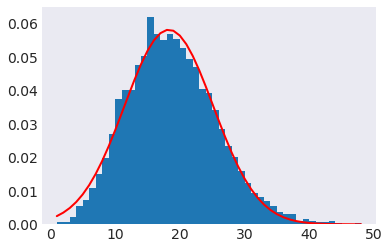

In [9]:
count, bins, ignored = plt.hist(y, 47, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

### Определение корреляции Пирсона

In [10]:
def pearson(a,b):
    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a-a_avg, b-b_avg))
    p_coef = numerator/denominator
    return p_coef

In [11]:
# Корреляции входных признаков с ответом y
corrs = np.zeros((300))
for i in range(300):
    corrs[i] = pearson(Matrix[:,i], y)

### t-критерий Стьюдента для оценки значимости корреляции

In [12]:
t = np.zeros_like(corrs)
t = corrs/np.sqrt(1-corrs**2) * np.sqrt(300-2)

### Доверительный интервал для параметра 99%

In [13]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [14]:
mean_t, left_t, right_t = mean_confidence_interval(t, confidence=0.99999)

### Выделение значимых признаков(признаков, входящих в доверительный интервал)

In [15]:
count = 0                               # Кол-во незначимых признаков
imp = list()                            # Список индексов значимых признаков
for i in range(len(t)):
    if t[i] < left_t or t[i] > right_t:
        count += 1
    else:
        imp.append(i)
print(300 - count)
print(imp) 

64
[23, 53, 59, 62, 65, 68, 71, 74, 82, 83, 86, 87, 101, 105, 107, 110, 111, 114, 119, 126, 140, 142, 152, 153, 162, 166, 168, 174, 180, 181, 183, 186, 189, 190, 193, 198, 201, 205, 211, 213, 214, 216, 222, 225, 226, 228, 231, 232, 238, 240, 241, 246, 247, 252, 255, 259, 261, 264, 267, 273, 276, 280, 291, 298]


### Построение Матрицы __значимых__ признаков тренировочной и тестовой выборки

In [16]:
print(Matrix.shape)
Matrix1 = np.zeros((10000, 300-count))       # Матрица значимых признаков тренировочной выборки
for i in range(len(imp)): 
    Matrix1[:, i] = Matrix[:, imp[i]]
print(Matrix1.shape)

(10000, 300)
(10000, 64)


In [17]:
Tester_Matrix = np.zeros((50000, 300-count)) # Матрицы значимых признаков тестовой выборки
for i in range(len(imp)):
    Tester_Matrix[:, i] = Tester[:, imp[i]]
print(Tester_Matrix.shape)

(50000, 64)


## Сравнение классификаторов Sklearn

### Использование кросс-валидации для оценки моделей на данных(Matrix)

In [15]:
from sklearn.model_selection import KFold

In [16]:
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(Correct_Matrix, y):
    X_train, X_test = Correct_Matrix[train_index], Correct_Matrix[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(X_train.shape)

(9000, 300)


#### Непредвзятая проверка моделей обучения
1. Обучаем модели на разбитых в методе KFold данных
2. Выводим точности для каждой
3. Из лучших составляем ансамбль
4. Проверяем его точность в сравнении с отдельными моделями
5. Выбираем лучшую модель
6. Обучаем модель на всей выборке
7. Предсказываем ответ и отправляем на проверку

In [17]:
from sklearn.model_selection import GridSearchCV     #Поиск лучших моделей
from sklearn.neighbors import KNeighborsRegressor    #K ближайших соседей, определим лучший параметр
from sklearn.ensemble import RandomForestRegressor   #Случайный лес. ВАЖНО: ограничить max_depth, иначе ооочень долго
from sklearn.linear_model import LogisticRegression  #Логистическая регрессия
from sklearn.ensemble import VotingRegressor         #Регрессор голосвания - ансамбль лучших моделей
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

##### KNN

In [28]:
knn = KNeighborsRegressor()
params_knn = {'n_neighbors': [100, 300, 500, 1000]}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 300}


##### Random Forest(сравнение параметра n_estimators)

In [29]:
rf = RandomForestRegressor()
params_rf = {'n_estimators': [100, 500, 1000, 5000], 'max_depth' : [3]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_depth': 3, 'n_estimators': 5000}


##### Logistic Regression

In [30]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

##### SGDClassifier

In [31]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

##### Ada Boost

In [32]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

##### Decision tree

In [33]:
tre = tree.DecisionTreeRegressor()
tre.fit(X_train, y_train)

DecisionTreeRegressor()

##### Ансамбль моделей -- регрессор голосования

In [54]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log', log), ('ada', ada), ('dec', tre), ('gaus', model), ('sgd', sgd)]
ensemble = VotingClassifier(estimators, voting='hard')

__Проверка результатов__

In [55]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.046

__Проверка точности предыдущих моделей__

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
def accuracy(model, X_test = X_test, y_test = y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [42]:
print("KNN " + str(knn_best.score(X_train, y_train)))
print("RandomForest " + str((rf_best.score(X_train, y_train))))
print("Logistic " + str(accuracy(log)))
print("SGD " + str(sgd.score(X_train, y_train)))
print("Ada " + str(ada.score(X_train, y_train)))
print("DecTree " + str(accuracy(tre)))

KNN 0.024570862459284304
RandomForest 0.07895576249155589
Logistic 0.046
SGD -2.9897434143987674e+25
Ada 0.16120463487274206
DecTree 0.04


In [43]:
# Ошибка модели RF
dif = np.abs(y_test - rf_best.predict(X_test)).mean()
print("Средняя абсолютная ошибка: " + str(dif))

Средняя абсолютная ошибка: 5.310826944651101


### Результат регрессоров sklearn
Лучшей моделью оказался: RandomForestRegressor(n_estimators = 5000, max_deph = 3)

Точность: 0.07895576249155589

Ошибка: 5.310826944651101

## Проверка ошибки -- средняя абсолютная ошибка

In [36]:
def dif(model, X_test = X_test, y_test = y_test):
    ans = np.abs(y_test - rf_best.predict(X_test)).mean()
    print("Средняя абсолютная ошибка: " + str(ans))
    return ans

## Тренировка лучшей модели регрессии RandomForestRegressor

### Подбор параметров
__Изначальные параметры__:
- n_estimators = 5000
- max_deph = 5
- max_features = кол-во признаков
- n_jobs = -1

#### Проверка параметра n_estimators

In [16]:
rf_Best_n = RandomForestRegressor()
params_rf_Best_n = {'n_estimators': [5000], 'max_depth' : [5], 'max_features' : [100, 300], 'min_samples_split' : [2, 20], 'min_samples_leaf' : [1, 5], 'n_jobs' : [-1]}
rf_gs_Best_n = GridSearchCV(rf_Best_n, params_rf_Best_n, cv=5, n_jobs=-1, verbose=2)
rf_gs_Best_n.fit(X_train, y_train)

rf_best_Best_n = rf_gs_Best_n.best_estimator_
print(rf_gs_Best_n.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 5, 'max_features': 300, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 5000, 'n_jobs': -1}


In [17]:
print(np.abs(y - rf_best_Best_n.predict(Correct_Matrix)).mean())

5.059807361011329


In [19]:
rf_Best_n = RandomForestRegressor()
params_rf_Best_n = {'n_estimators': [5000], 'max_depth' : [2, 5], 'max_features' : [300], 
                    'min_samples_split' : [20], 'min_samples_leaf' : [5], 'n_jobs' : [-1]}
rf_gs_Best_n1 = GridSearchCV(rf_Best_n, params_rf_Best_n, cv=5, n_jobs=-1, verbose=2)
rf_gs_Best_n1.fit(X_train, y_train)

rf_best_deph = rf_gs_Best_n1.best_estimator_
print(rf_gs_Best_n1.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'max_depth': 5, 'max_features': 300, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 5000, 'n_jobs': -1}


In [20]:
print(np.abs(y - rf_best_deph.predict(Correct_Matrix)).mean())

5.060724215492922


In [ ]:
rf_Best_n = RandomForestRegressor()
params_rf_Best_n = {'n_estimators': [5000], 'max_depth' : [5], 'max_features' : [300], 
                    'min_samples_split' : [20, 30], 'min_samples_leaf' : [10, 20], 'n_jobs' : [-1]}
rf_gs_Best_n1 = GridSearchCV(rf_Best_n, params_rf_Best_n, cv=5, n_jobs=-1, verbose=2)
rf_gs_Best_n1.fit(X_train, y_train)

rf_best_deph = rf_gs_Best_n1.best_estimator_
print(rf_gs_Best_n1.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [25]:
print(np.abs(y - rf_best_deph.predict(Correct_Matrix)).mean())

5.057996233178779


### Результат тестирования (начало в 12:46 -- конец в 15:21)

__Лучшая модель__

- {'max_depth': 5, 'max_features': 300, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 5000, 'n_jobs': -1}

## Проверка других моделей регрессии(например, МНК)

На степенях полинома $\ge 7$ невозможно найти параметры, ошибка становится очень большой, порядка $10^{12}$

In [40]:
from scipy.optimize import curve_fit

In [51]:
l = 200  + 1 # кол-во признаков(при проверке проверялись 42 признака)

In [52]:
# 1-ая степень
for i in range(1, l):
    print('a'+str(i)+', ', end='')
# 2-ая степень
for i in range(1, l):
    print('b'+str(i)+', ', end='')
# 3-ья степень
for i in range(1, l):
    print('c'+str(i)+', ', end='')
# 4-ая степень
#for i in range(1, l):
#    print('d'+str(i)+', ', end='')
# 5-ая степень
#for i in range(1, l):
#    print('e'+str(i)+', ', end='')
# 6-ая степень
#for i in range(1, l):
#    print('f'+str(i)+', ', end='')

for i in range(1, l):
    print('a'+str(i)+'*X[:,'+str(i-1)+'] + ', end='')
for i in range(1, l):
    print('b'+str(i)+'*X[:,'+str(i-1)+']**2 + ', end='')
for i in range(1, l):
    print('c'+str(i)+'*X[:,'+str(i-1)+']**3 + ', end='')
#for i in range(1, l):
#    print('d'+str(i)+'*X[:,'+str(i-1)+']**4 + ', end='')
#for i in range(1, l):
#    print('e'+str(i)+'*X[:,'+str(i-1)+']**5 + ', end='')
#for i in range(1, l):
#    print('f'+str(i)+'*X[:,'+str(i-1)+']**6 + ', end='')

a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80, a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100, a101, a102, a103, a104, a105, a106, a107, a108, a109, a110, a111, a112, a113, a114, a115, a116, a117, a118, a119, a120, a121, a122, a123, a124, a125, a126, a127, a128, a129, a130, a131, a132, a133, a134, a135, a136, a137, a138, a139, a140, a141, a142, a143, a144, a145, a146, a147, a148, a149, a150, a151, a152, a153, a154, a155, a156, a157, a158, a159, a160, a161, a162, a163, a164, a165, a166, a167, a168, a169, a170, a171, a172, a173, a174, a175, a176, a177, a178, a179, a180, a181, a182, a183, a184, a185

In [54]:
def f(X, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80, a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100, a101, a102, a103, a104, a105, a106, a107, a108, a109, a110, a111, a112, a113, a114, a115, a116, a117, a118, a119, a120, a121, a122, a123, a124, a125, a126, a127, a128, a129, a130, a131, a132, a133, a134, a135, a136, a137, a138, a139, a140, a141, a142, a143, a144, a145, a146, a147, a148, a149, a150, a151, a152, a153, a154, a155, a156, a157, a158, a159, a160, a161, a162, a163, a164, a165, a166, a167, a168, a169, a170, a171, a172, a173, a174, a175, a176, a177, a178, a179, a180, a181, a182, a183, a184, a185, a186, a187, a188, a189, a190, a191, a192, a193, a194, a195, a196, a197, a198, a199, a200, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20, b21, b22, b23, b24, b25, b26, b27, b28, b29, b30, b31, b32, b33, b34, b35, b36, b37, b38, b39, b40, b41, b42, b43, b44, b45, b46, b47, b48, b49, b50, b51, b52, b53, b54, b55, b56, b57, b58, b59, b60, b61, b62, b63, b64, b65, b66, b67, b68, b69, b70, b71, b72, b73, b74, b75, b76, b77, b78, b79, b80, b81, b82, b83, b84, b85, b86, b87, b88, b89, b90, b91, b92, b93, b94, b95, b96, b97, b98, b99, b100, b101, b102, b103, b104, b105, b106, b107, b108, b109, b110, b111, b112, b113, b114, b115, b116, b117, b118, b119, b120, b121, b122, b123, b124, b125, b126, b127, b128, b129, b130, b131, b132, b133, b134, b135, b136, b137, b138, b139, b140, b141, b142, b143, b144, b145, b146, b147, b148, b149, b150, b151, b152, b153, b154, b155, b156, b157, b158, b159, b160, b161, b162, b163, b164, b165, b166, b167, b168, b169, b170, b171, b172, b173, b174, b175, b176, b177, b178, b179, b180, b181, b182, b183, b184, b185, b186, b187, b188, b189, b190, b191, b192, b193, b194, b195, b196, b197, b198, b199, b200, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30, c31, c32, c33, c34, c35, c36, c37, c38, c39, c40, c41, c42, c43, c44, c45, c46, c47, c48, c49, c50, c51, c52, c53, c54, c55, c56, c57, c58, c59, c60, c61, c62, c63, c64, c65, c66, c67, c68, c69, c70, c71, c72, c73, c74, c75, c76, c77, c78, c79, c80, c81, c82, c83, c84, c85, c86, c87, c88, c89, c90, c91, c92, c93, c94, c95, c96, c97, c98, c99, c100, c101, c102, c103, c104, c105, c106, c107, c108, c109, c110, c111, c112, c113, c114, c115, c116, c117, c118, c119, c120, c121, c122, c123, c124, c125, c126, c127, c128, c129, c130, c131, c132, c133, c134, c135, c136, c137, c138, c139, c140, c141, c142, c143, c144, c145, c146, c147, c148, c149, c150, c151, c152, c153, c154, c155, c156, c157, c158, c159, c160, c161, c162, c163, c164, c165, c166, c167, c168, c169, c170, c171, c172, c173, c174, c175, c176, c177, c178, c179, c180, c181, c182, c183, c184, c185, c186, c187, c188, c189, c190, c191, c192, c193, c194, c195, c196, c197, c198, c199, c200,
      m):
    return (a1*X[:,0] + a2*X[:,1] + a3*X[:,2] + a4*X[:,3] + a5*X[:,4] + a6*X[:,5] + a7*X[:,6] + a8*X[:,7] + a9*X[:,8] + a10*X[:,9] + a11*X[:,10] + a12*X[:,11] + a13*X[:,12] + a14*X[:,13] + a15*X[:,14] + a16*X[:,15] + a17*X[:,16] + a18*X[:,17] + a19*X[:,18] + a20*X[:,19] + a21*X[:,20] + a22*X[:,21] + a23*X[:,22] + a24*X[:,23] + a25*X[:,24] + a26*X[:,25] + a27*X[:,26] + 
            a28*X[:,27] + a29*X[:,28] + a30*X[:,29] + a31*X[:,30] + a32*X[:,31] + a33*X[:,32] + a34*X[:,33] + a35*X[:,34] + a36*X[:,35] + a37*X[:,36] + a38*X[:,37] + a39*X[:,38] + a40*X[:,39] + a41*X[:,40] + a42*X[:,41] + a43*X[:,42] + a44*X[:,43] + a45*X[:,44] + a46*X[:,45] + a47*X[:,46] + a48*X[:,47] + a49*X[:,48] + a50*X[:,49] + a51*X[:,50] + a52*X[:,51] + a53*X[:,52] + a54*X[:,53] + a55*X[:,54] + a56*X[:,55] + a57*X[:,56] + a58*X[:,57] + a59*X[:,58] + a60*X[:,59] + a61*X[:,60] + a62*X[:,61] + a63*X[:,62] + a64*X[:,63] + a65*X[:,64] + a66*X[:,65] + a67*X[:,66] + a68*X[:,67] + a69*X[:,68] + a70*X[:,69] + a71*X[:,70] + a72*X[:,71] + a73*X[:,72] + a74*X[:,73] + a75*X[:,74] + a76*X[:,75] + a77*X[:,76] + a78*X[:,77] + a79*X[:,78] + a80*X[:,79] + a81*X[:,80] + a82*X[:,81] + a83*X[:,82] + a84*X[:,83] + a85*X[:,84] + a86*X[:,85] + a87*X[:,86] + a88*X[:,87] + a89*X[:,88] + a90*X[:,89] + a91*X[:,90] + a92*X[:,91] + a93*X[:,92] + a94*X[:,93] + a95*X[:,94] + a96*X[:,95] + a97*X[:,96] + a98*X[:,97] + a99*X[:,98] + a100*X[:,99] + a101*X[:,100] + a102*X[:,101] + a103*X[:,102] + a104*X[:,103] + a105*X[:,104] + a106*X[:,105] + a107*X[:,106] + a108*X[:,107] + a109*X[:,108] + a110*X[:,109] + a111*X[:,110] + a112*X[:,111] + a113*X[:,112] + a114*X[:,113] + a115*X[:,114] + a116*X[:,115] + a117*X[:,116] + a118*X[:,117] + a119*X[:,118] + a120*X[:,119] + a121*X[:,120] + a122*X[:,121] + a123*X[:,122] + a124*X[:,123] + a125*X[:,124] + a126*X[:,125] + a127*X[:,126] + a128*X[:,127] + a129*X[:,128] + a130*X[:,129] + a131*X[:,130] + a132*X[:,131] + a133*X[:,132] + a134*X[:,133] + a135*X[:,134] + a136*X[:,135] + a137*X[:,136] + a138*X[:,137] + a139*X[:,138] + a140*X[:,139] + a141*X[:,140] + a142*X[:,141] + a143*X[:,142] + a144*X[:,143] + a145*X[:,144] + a146*X[:,145] + a147*X[:,146] + a148*X[:,147] + a149*X[:,148] + a150*X[:,149] + a151*X[:,150] + a152*X[:,151] + a153*X[:,152] + a154*X[:,153] + a155*X[:,154] + a156*X[:,155] + a157*X[:,156] + a158*X[:,157] + a159*X[:,158] + a160*X[:,159] + a161*X[:,160] + a162*X[:,161] + a163*X[:,162] + a164*X[:,163] + a165*X[:,164] + a166*X[:,165] + a167*X[:,166] + a168*X[:,167] + a169*X[:,168] + a170*X[:,169] + a171*X[:,170] + a172*X[:,171] + a173*X[:,172] + a174*X[:,173] + a175*X[:,174] + a176*X[:,175] + a177*X[:,176] + a178*X[:,177] + a179*X[:,178] + a180*X[:,179] + a181*X[:,180] + a182*X[:,181] + a183*X[:,182] + a184*X[:,183] + a185*X[:,184] + a186*X[:,185] + a187*X[:,186] + a188*X[:,187] + a189*X[:,188] + a190*X[:,189] + a191*X[:,190] + a192*X[:,191] + a193*X[:,192] + a194*X[:,193] + a195*X[:,194] + a196*X[:,195] + a197*X[:,196] + a198*X[:,197] + a199*X[:,198] + a200*X[:,199] + b1*X[:,0]**2 + b2*X[:,1]**2 + b3*X[:,2]**2 + b4*X[:,3]**2 + b5*X[:,4]**2 + b6*X[:,5]**2 + b7*X[:,6]**2 + b8*X[:,7]**2 + b9*X[:,8]**2 + b10*X[:,9]**2 + b11*X[:,10]**2 + b12*X[:,11]**2 + b13*X[:,12]**2 + b14*X[:,13]**2 + b15*X[:,14]**2 + b16*X[:,15]**2 + b17*X[:,16]**2 + b18*X[:,17]**2 + b19*X[:,18]**2 + b20*X[:,19]**2 + b21*X[:,20]**2 + b22*X[:,21]**2 + b23*X[:,22]**2 + b24*X[:,23]**2 + b25*X[:,24]**2 + b26*X[:,25]**2 + b27*X[:,26]**2 + b28*X[:,27]**2 + b29*X[:,28]**2 + b30*X[:,29]**2 + b31*X[:,30]**2 + b32*X[:,31]**2 + b33*X[:,32]**2 + b34*X[:,33]**2 + b35*X[:,34]**2 + b36*X[:,35]**2 + b37*X[:,36]**2 + b38*X[:,37]**2 + b39*X[:,38]**2 + b40*X[:,39]**2 + b41*X[:,40]**2 + b42*X[:,41]**2 + b43*X[:,42]**2 + b44*X[:,43]**2 + b45*X[:,44]**2 + b46*X[:,45]**2 + b47*X[:,46]**2 + b48*X[:,47]**2 + b49*X[:,48]**2 + b50*X[:,49]**2 + b51*X[:,50]**2 + b52*X[:,51]**2 + b53*X[:,52]**2 + b54*X[:,53]**2 + b55*X[:,54]**2 + b56*X[:,55]**2 + b57*X[:,56]**2 + b58*X[:,57]**2 + b59*X[:,58]**2 + b60*X[:,59]**2 + b61*X[:,60]**2 + b62*X[:,61]**2 + b63*X[:,62]**2 + b64*X[:,63]**2 + b65*X[:,64]**2 + b66*X[:,65]**2 + b67*X[:,66]**2 + b68*X[:,67]**2 + b69*X[:,68]**2 + b70*X[:,69]**2 + b71*X[:,70]**2 + b72*X[:,71]**2 + b73*X[:,72]**2 + b74*X[:,73]**2 + b75*X[:,74]**2 + b76*X[:,75]**2 + b77*X[:,76]**2 + b78*X[:,77]**2 + b79*X[:,78]**2 + b80*X[:,79]**2 + b81*X[:,80]**2 + b82*X[:,81]**2 + b83*X[:,82]**2 + b84*X[:,83]**2 + b85*X[:,84]**2 + b86*X[:,85]**2 + b87*X[:,86]**2 + b88*X[:,87]**2 + b89*X[:,88]**2 + b90*X[:,89]**2 + b91*X[:,90]**2 + b92*X[:,91]**2 + b93*X[:,92]**2 + b94*X[:,93]**2 + b95*X[:,94]**2 + b96*X[:,95]**2 + b97*X[:,96]**2 + b98*X[:,97]**2 + b99*X[:,98]**2 + b100*X[:,99]**2 + b101*X[:,100]**2 + b102*X[:,101]**2 + b103*X[:,102]**2 + b104*X[:,103]**2 + b105*X[:,104]**2 + b106*X[:,105]**2 + b107*X[:,106]**2 + b108*X[:,107]**2 + b109*X[:,108]**2 + b110*X[:,109]**2 + b111*X[:,110]**2 + b112*X[:,111]**2 + b113*X[:,112]**2 + b114*X[:,113]**2 + b115*X[:,114]**2 + b116*X[:,115]**2 + b117*X[:,116]**2 + b118*X[:,117]**2 + b119*X[:,118]**2 + b120*X[:,119]**2 + b121*X[:,120]**2 + b122*X[:,121]**2 + b123*X[:,122]**2 + b124*X[:,123]**2 + b125*X[:,124]**2 + b126*X[:,125]**2 + b127*X[:,126]**2 + b128*X[:,127]**2 + b129*X[:,128]**2 + b130*X[:,129]**2 + b131*X[:,130]**2 + b132*X[:,131]**2 + b133*X[:,132]**2 + b134*X[:,133]**2 + b135*X[:,134]**2 + b136*X[:,135]**2 + b137*X[:,136]**2 + b138*X[:,137]**2 + b139*X[:,138]**2 + b140*X[:,139]**2 + b141*X[:,140]**2 + b142*X[:,141]**2 + b143*X[:,142]**2 + b144*X[:,143]**2 + b145*X[:,144]**2 + b146*X[:,145]**2 + b147*X[:,146]**2 + b148*X[:,147]**2 + b149*X[:,148]**2 + b150*X[:,149]**2 + b151*X[:,150]**2 + b152*X[:,151]**2 + b153*X[:,152]**2 + b154*X[:,153]**2 + b155*X[:,154]**2 + b156*X[:,155]**2 + b157*X[:,156]**2 + b158*X[:,157]**2 + b159*X[:,158]**2 + b160*X[:,159]**2 + b161*X[:,160]**2 + b162*X[:,161]**2 + b163*X[:,162]**2 + b164*X[:,163]**2 + b165*X[:,164]**2 + b166*X[:,165]**2 + b167*X[:,166]**2 + b168*X[:,167]**2 + b169*X[:,168]**2 + b170*X[:,169]**2 + b171*X[:,170]**2 + b172*X[:,171]**2 + b173*X[:,172]**2 + b174*X[:,173]**2 + b175*X[:,174]**2 + b176*X[:,175]**2 + b177*X[:,176]**2 + b178*X[:,177]**2 + b179*X[:,178]**2 + b180*X[:,179]**2 + b181*X[:,180]**2 + b182*X[:,181]**2 + b183*X[:,182]**2 + b184*X[:,183]**2 + b185*X[:,184]**2 + b186*X[:,185]**2 + b187*X[:,186]**2 + b188*X[:,187]**2 + b189*X[:,188]**2 + b190*X[:,189]**2 + b191*X[:,190]**2 + b192*X[:,191]**2 + b193*X[:,192]**2 + b194*X[:,193]**2 + b195*X[:,194]**2 + b196*X[:,195]**2 + b197*X[:,196]**2 + b198*X[:,197]**2 + b199*X[:,198]**2 + b200*X[:,199]**2 + c1*X[:,0]**3 + c2*X[:,1]**3 + c3*X[:,2]**3 + c4*X[:,3]**3 + c5*X[:,4]**3 + c6*X[:,5]**3 + c7*X[:,6]**3 + c8*X[:,7]**3 + c9*X[:,8]**3 + c10*X[:,9]**3 + c11*X[:,10]**3 + c12*X[:,11]**3 + c13*X[:,12]**3 + c14*X[:,13]**3 + c15*X[:,14]**3 + c16*X[:,15]**3 + c17*X[:,16]**3 + c18*X[:,17]**3 + c19*X[:,18]**3 + c20*X[:,19]**3 + c21*X[:,20]**3 + c22*X[:,21]**3 + c23*X[:,22]**3 + c24*X[:,23]**3 + c25*X[:,24]**3 + c26*X[:,25]**3 + c27*X[:,26]**3 + c28*X[:,27]**3 + c29*X[:,28]**3 + c30*X[:,29]**3 + c31*X[:,30]**3 + c32*X[:,31]**3 + c33*X[:,32]**3 + c34*X[:,33]**3 + c35*X[:,34]**3 + c36*X[:,35]**3 + c37*X[:,36]**3 + c38*X[:,37]**3 + c39*X[:,38]**3 + c40*X[:,39]**3 + c41*X[:,40]**3 + c42*X[:,41]**3 + c43*X[:,42]**3 + c44*X[:,43]**3 + c45*X[:,44]**3 + c46*X[:,45]**3 + c47*X[:,46]**3 + c48*X[:,47]**3 + c49*X[:,48]**3 + c50*X[:,49]**3 + c51*X[:,50]**3 + c52*X[:,51]**3 + c53*X[:,52]**3 + c54*X[:,53]**3 + c55*X[:,54]**3 + c56*X[:,55]**3 + c57*X[:,56]**3 + c58*X[:,57]**3 + c59*X[:,58]**3 + c60*X[:,59]**3 + c61*X[:,60]**3 + c62*X[:,61]**3 + c63*X[:,62]**3 + c64*X[:,63]**3 + c65*X[:,64]**3 + c66*X[:,65]**3 + c67*X[:,66]**3 + c68*X[:,67]**3 + c69*X[:,68]**3 + c70*X[:,69]**3 + c71*X[:,70]**3 + c72*X[:,71]**3 + c73*X[:,72]**3 + c74*X[:,73]**3 + c75*X[:,74]**3 + c76*X[:,75]**3 + c77*X[:,76]**3 + c78*X[:,77]**3 + c79*X[:,78]**3 + c80*X[:,79]**3 + c81*X[:,80]**3 + c82*X[:,81]**3 + c83*X[:,82]**3 + c84*X[:,83]**3 + c85*X[:,84]**3 + c86*X[:,85]**3 + c87*X[:,86]**3 + c88*X[:,87]**3 + c89*X[:,88]**3 + c90*X[:,89]**3 + c91*X[:,90]**3 + c92*X[:,91]**3 + c93*X[:,92]**3 + c94*X[:,93]**3 + c95*X[:,94]**3 + c96*X[:,95]**3 + c97*X[:,96]**3 + c98*X[:,97]**3 + c99*X[:,98]**3 + c100*X[:,99]**3 + c101*X[:,100]**3 + c102*X[:,101]**3 + c103*X[:,102]**3 + c104*X[:,103]**3 + c105*X[:,104]**3 + c106*X[:,105]**3 + c107*X[:,106]**3 + c108*X[:,107]**3 + c109*X[:,108]**3 + c110*X[:,109]**3 + c111*X[:,110]**3 + c112*X[:,111]**3 + c113*X[:,112]**3 + c114*X[:,113]**3 + c115*X[:,114]**3 + c116*X[:,115]**3 + c117*X[:,116]**3 + c118*X[:,117]**3 + c119*X[:,118]**3 + c120*X[:,119]**3 + c121*X[:,120]**3 + c122*X[:,121]**3 + c123*X[:,122]**3 + c124*X[:,123]**3 + c125*X[:,124]**3 + c126*X[:,125]**3 + c127*X[:,126]**3 + c128*X[:,127]**3 + c129*X[:,128]**3 + c130*X[:,129]**3 + c131*X[:,130]**3 + c132*X[:,131]**3 + c133*X[:,132]**3 + c134*X[:,133]**3 + c135*X[:,134]**3 + c136*X[:,135]**3 + c137*X[:,136]**3 + c138*X[:,137]**3 + c139*X[:,138]**3 + c140*X[:,139]**3 + c141*X[:,140]**3 + c142*X[:,141]**3 + c143*X[:,142]**3 + c144*X[:,143]**3 + c145*X[:,144]**3 + c146*X[:,145]**3 + c147*X[:,146]**3 + c148*X[:,147]**3 + c149*X[:,148]**3 + c150*X[:,149]**3 + c151*X[:,150]**3 + c152*X[:,151]**3 + c153*X[:,152]**3 + c154*X[:,153]**3 + c155*X[:,154]**3 + c156*X[:,155]**3 + c157*X[:,156]**3 + c158*X[:,157]**3 + c159*X[:,158]**3 + c160*X[:,159]**3 + c161*X[:,160]**3 + c162*X[:,161]**3 + c163*X[:,162]**3 + c164*X[:,163]**3 + c165*X[:,164]**3 + c166*X[:,165]**3 + c167*X[:,166]**3 + c168*X[:,167]**3 + c169*X[:,168]**3 + c170*X[:,169]**3 + c171*X[:,170]**3 + c172*X[:,171]**3 + c173*X[:,172]**3 + c174*X[:,173]**3 + c175*X[:,174]**3 + c176*X[:,175]**3 + c177*X[:,176]**3 + c178*X[:,177]**3 + c179*X[:,178]**3 + c180*X[:,179]**3 + c181*X[:,180]**3 + c182*X[:,181]**3 + c183*X[:,182]**3 + c184*X[:,183]**3 + c185*X[:,184]**3 + c186*X[:,185]**3 + c187*X[:,186]**3 + c188*X[:,187]**3 + c189*X[:,188]**3 + c190*X[:,189]**3 + c191*X[:,190]**3 + c192*X[:,191]**3 + c193*X[:,192]**3 + c194*X[:,193]**3 + c195*X[:,194]**3 + c196*X[:,195]**3 + c197*X[:,196]**3 + c198*X[:,197]**3 + c199*X[:,198]**3 + c200*X[:,199]**3 + 
            m)

In [70]:
MNK_Matrix = np.zeros((10000, 200))
for i in range(100):
    MNK_Matrix[:,2*i] = Correct_Matrix[:,3*i+1]/100
    MNK_Matrix[:,2*i+1] = Correct_Matrix[:,3*i+2]
print(MNK_Matrix.shape)

(10000, 200)


In [71]:
print(Correct_Matrix.shape)

(10000, 300)


In [72]:
cofs, _ = curve_fit(f, MNK_Matrix, y)

In [73]:
print(cofs.shape)

(601,)


In [74]:
l1 = l-1

In [75]:
def fun(X, ar):
    return (X.dot(ar[:l1]) + (X**2).dot(ar[l1:(2*l1)]) + (X**3).dot(ar[(2*l1):(3*l1)]) +
            #(X**4).dot(ar[(3*l1):(4*l1)]) + (X**5).dot(ar[(4*l1):(5*l1)]) + (X**6).dot(ar[(5*l1):(6*l1)]) +
            ar[-1])

# Вторая неделя

## Проверка МНК для параметров без учета типов методов

In [76]:
MNK_Tester = np.zeros((50000, 200))
for i in range(100):
    MNK_Tester[:,2*i] = Correct_Tester[:,3*i+1]/100
    MNK_Tester[:,2*i+1] = Correct_Tester[:,3*i+2]
print(MNK_Tester.shape)

(50000, 200)


In [77]:
y_mnk = fun(MNK_Tester, cofs)
print(y_mnk.shape)
print(y_mnk)
dif = np.abs(y - fun(MNK_Matrix, cofs)).mean()
print(dif)

(50000,)
[14.46479949 16.01043969 23.42541949 ... 19.07039872 14.29782743
 14.08791359]
3.8957499935960485


### 4-ая степень(время поиска 1.5 часа)

In [30]:
y_mnk = fun(Tester, cofs)
print(y_mnk.shape)
print(y_mnk)
dif = np.abs(y - fun(Matrix, cofs)).mean()
print(dif)

(50000,)
[15.92107113 16.14234477 24.72814375 ... 25.05600023 15.54393769
 11.16059917]
3.033704383752483


In [107]:
y_mnk = fun(Tester_Matrix, cofs)
print(y_mnk.shape)
print(y_mnk)
dif = np.abs(y - fun(Matrix1, cofs)).mean()
print(dif)

(50000,)
[17.75566128 20.25299547 17.40513659 ... 13.92114814 16.13770784
 16.71005132]
4.611651715730697


### Результат подбора параметров для МНК полинома 6-ой степени от 42 значимых признаков

In [59]:
y_mnk = fun(Tester_Matrix, cofs)
print(y_mnk.shape)
print(y_mnk)

(50000,)
[15.3249454  19.30929694 16.91540181 ... 15.55070284 19.10789593
 16.15705615]


In [60]:
dif = np.abs(y - fun(Matrix1, cofs)).mean()
print(dif)

4.870604365694106


## Deep Learning algorithm

Лучшая модель
- 3 слоя
- 1-ый слой: 200 нейронов
- 2-ой слой: 100 нейронов
- 3-ий слой: 50 нейронов

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models
import os

In [53]:
dl = Sequential()
dl.add(Dense(200, activation = 'relu', input_shape=(X_train.shape[1],)))
dl.add(Dense(100, activation='relu', input_shape =(45,)))
dl.add(Dense(1))
dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Проверка ошибки сети и сохранение модели

In [54]:
def check_stat(model, X_test = X_test, y_test = y_test, path = './Best_Model/dl_model.h5'):
    mse, mae = model.evaluate(X_test, y_test, verbose=0)
    print("Средняя абсолютная ошибка: " + str(mae))
    model.save(path)

### Получение модели из файла

In [55]:
def get_model(path = './Best_Model/dl_model.h5'):
    model = load_model(path)
    return model

### Обучение модели

In [56]:
dl.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
9000/9000 - 9s - loss: 53.1983 - mae: 5.7283
Epoch 2/100
9000/9000 - 7s - loss: 40.1535 - mae: 5.0514
Epoch 3/100
9000/9000 - 7s - loss: 35.8744 - mae: 4.7551
Epoch 4/100
9000/9000 - 7s - loss: 33.1565 - mae: 4.5893
Epoch 5/100
9000/9000 - 7s - loss: 30.9693 - mae: 4.4162
Epoch 6/100
9000/9000 - 7s - loss: 27.9776 - mae: 4.1873
Epoch 7/100
9000/9000 - 7s - loss: 26.2744 - mae: 4.0286
Epoch 8/100
9000/9000 - 7s - loss: 23.6747 - mae: 3.8287
Epoch 9/100
9000/9000 - 8s - loss: 21.5139 - mae: 3.6592
Epoch 10/100
9000/9000 - 7s - loss: 19.2238 - mae: 3.4440
Epoch 11/100
9000/9000 - 7s - loss: 17.5178 - mae: 3.3049
Epoch 12/100
9000/9000 - 7s - loss: 16.2375 - mae: 3.1781
Epoch 13/100
9000/9000 - 7s - loss: 14.6881 - mae: 3.0192
Epoch 14/100
9000/9000 - 11s - loss: 13.4697 - mae: 2.8803
Epoch 15/100
9000/9000 - 9s - loss: 12.2594 - mae: 2.7452
Epoch 16/100
9000/9000 - 7s - loss: 11.5528 - mae: 2.6782
Epoch 17/100
9000/9000 - 8s - loss: 10.5670 - mae: 2.5566
Epoch 18/100
9000/9000

In [57]:
check_stat(dl)

Средняя абсолютная ошибка: 5.352691173553467


## Известны имена признаков

### Проверка гипотез

#### Наблюдения
---

Признаки - добавление, вычитание или бездействие

Второй показатель - кол-во вещества

Третий показатель - емкость вещества

##### Нормализация данных(замена -1 на 0)

In [8]:
def preprocess(Matrix):
    Ans = np.array(Matrix)
    for i in range(100):
        for j in range(3):
            for k in range(Matrix.shape[0]):
                if (Matrix[k][3*i+j] == -1):
                    Ans[k][3*i+j] = 0
    return Ans

In [9]:
Correct_Matrix = preprocess(Matrix)
print((Correct_Matrix == -1).any())

False


In [10]:
Correct_Tester = preprocess(Tester)
print((Correct_Tester == -1).any())

False


#### Гипотеза №1

1-ая характеристика - это концентрация

2-ая характеристика - это масса

Типы операций:
- 0 - добавить к смеси некоторую массу раствора заданной концентрации
- 1 - добавить массу воды 
- 2 - убрать из смеси некоторую массу раствора заданной массы
- 3 - добиться заданной концентрации

Целевой признак - концентрация после преобразований

In [8]:
def operate(type, mas, percent, current_all, current_salt):
    percent = float(percent / 100)
    if type == 1:
        salt_add = mas*percent
        water_add = mas - salt_add
        current_all -= water_add
        current_salt -= salt_add
    elif type == 3:
        salt_add = mas * percent
        water_add = mas - salt_add
        current_all += water_add
        current_salt += salt_add
    elif type == 0:
        if percent == 0:
            current_all -= current_salt
            current_salt = 0
        else:
            current_all = current_salt/percent
    elif type == 2:
        current_all += mas
        
    return (current_all, current_salt)

##### Анализ распределения характеристик

In [48]:
print(Correct_Matrix[:,2].mean())

1.1203349999999999


##### Проверка наличия отрицательных масс соли

In [43]:
hypothesis_1 = np.zeros((10000))
li = list()
mas = np.zeros_like(hypothesis_1)
salt = np.zeros_like(hypothesis_1)
for i in range(10000):
    mas[i] = 18.3
    for j in range(100):
        mas[i], salt[i] = operate(Correct_Matrix[i][3*j], Correct_Matrix[i][3*j+1], Correct_Matrix[i][3*j+2], mas[i], salt[i])
        if salt[i] < 0:
            li.append(3*j)
    hypothesis_1[i] = (salt[i]/mas[i]) * 100
print(li)
print(mas)
print(salt)
print(hypothesis_1)
print(y)
print(np.abs(y - hypothesis_1).mean())

[36, 39, 51, 54, 66, 69, 123, 126, 129, 159, 162, 165, 186, 189, 192, 195, 210, 213, 216, 219, 246, 279, 282, 9, 15, 24, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 93, 99, 114, 126, 129, 150, 153, 156, 180, 183, 186, 195, 198, 201, 213, 237, 240, 243, 246, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 0, 3, 66, 69, 72, 228, 231, 234, 240, 252, 255, 258, 261, 264, 282, 285, 291, 6, 9, 12, 15, 105, 108, 117, 120, 135, 162, 165, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 231, 237, 240, 243, 246, 249, 252, 255, 258, 261, 270, 273, 276, 18, 21, 36, 42, 45, 48, 51, 54, 57, 60, 81, 84, 87, 90, 93, 96, 102, 105, 108, 141, 147, 183, 186, 189, 192, 237, 240, 249, 252, 276, 279, 282, 288, 291, 294, 297, 3, 6, 81, 123, 171, 174, 177, 243, 246, 258, 267, 270, 288, 291, 294, 297, 12, 15, 27, 30, 33, 57, 93, 96, 99, 102, 105, 150, 153, 156, 174, 177, 201, 249, 261, 270, 276, 279, 282, 285, 288, 291, 294, 45, 48, 51, 54, 57, 60, 93, 114, 117, 123, 138, 141, 144, 1

##### Проверка частот появления разных значений процентов

In [75]:
percents = np.zeros((101, 100))
for i in range(10000):
    for j in range(100):
        if Matrix[i][3*j+1] != -1:
            percents[int(Matrix[i][3*j+1])][j] += 1
print(percents)

[[ 51.  53.  64. ...  54.  52.  40.]
 [487. 435. 470. ... 462. 479. 444.]
 [501. 469. 460. ... 487. 471. 434.]
 ...
 [ 42.  70.  59. ...  45.  62.  53.]
 [ 48.  41.  49. ...  44.  55.  46.]
 [ 47.  33.  54. ...  33.  43.  56.]]


#### Проверка близости линейного полинома к значению целевого признака

[18.4219 28.2703  6.9814 ... 11.901   7.8855 22.1043]
0       19.0
1       25.0
2       22.0
3       22.0
4       24.0
        ... 
9995    14.0
9996     7.0
9997    18.0
9998     7.0
9999     9.0
Name: y, Length: 10000, dtype: float64
6.98379433
4015
5957


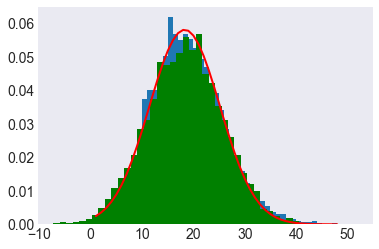

In [14]:
sum = np.zeros((10000))
for j in range(10000):
    for i in range(100):
        if Correct_Matrix[j,3*i] == 1:
            sum[j] += Correct_Matrix[j,3*i+2]*Correct_Matrix[j,3*i+1]/100
        elif Correct_Matrix[j,3*i] == 3:
            sum[j] -= Correct_Matrix[j,3*i+2]*Correct_Matrix[j,3*i+1]/100
        #elif Correct_Matrix[j,3*i] == 2:
        #    sum[j] += Correct_Matrix[j,3*i+2]
        #elif Correct_Matrix[j,3*i] == 0:
        #    sum[j] = Correct_Matrix[j,3*i+1]/100
sum += 18.3
print(sum)
print(y)
print(np.abs(y - sum).mean())
sigma = 6.87
mu = 18.3
count, bins, ignored = plt.hist(y, 47, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
plt.hist(sum, 47, density=True, color='g')
print(y.argmax())
print(sum.argmax())
plt.savefig('./3-1+.png')

#### Анализ частот появления разных методов

In [23]:
count0 = 0
count2 = 0
for i in range(100):
    if Correct_Matrix[9997][3*i] == 0:
        count0 += 1
    elif Correct_Matrix[9997][3*i] == 2:
        count2 += 1
print(count0)
print(count2)

count0 = 0
count2 = 0
for i in range(100):
    if Correct_Matrix[9998][3*i] == 0:
        count0 += 1
    elif Correct_Matrix[9998][3*i] == 2:
        count2 += 1
print(count0)
print(count2)

count0 = 0
count2 = 0
for i in range(100):
    if Correct_Matrix[9999][3*i] == 0:
        count0 += 1
    elif Correct_Matrix[9999][3*i] == 2:
        count2 += 1
print(count0)
print(count2)

30
18
27
29
35
21


### Проверка гипотезы, что в эксперименте нет опытов с методами 0 и 2 с двумя заданными характеристиками

In [17]:
count = 0
#res = np.zeros((100, 2))
for i in range(Matrix.shape[0]):
    for j in range(100):
        if Matrix[i][3*j] == 2 or Matrix[i][3*j] == 0:
            if Matrix[i][3*j+1] != -1 and Matrix[i][3*j+2] != -1:
                count += 1
print(count)

0


### Проверка гипотезы, что в эксперименте нет опытов с методом 0 и с заданной второй характеристикой

In [31]:
count = 0
for i in range(Matrix.shape[0]):
    for j in range(100):
        if Matrix[i][3*j] == 0:
            if Matrix[i][3*j+2] != -1:# and Matrix[i][3*j+2] != -1:
                count += 1
print(count)

0


### Проверка гипотезы, что в эксперименте нет опытов с методом 2 и с заданной первой характеристикой

In [32]:
count = 0
for i in range(Matrix.shape[0]):
    for j in range(100):
        if Matrix[i][3*j] == 2:
            if Matrix[i][3*j+1] != -1:# and Matrix[i][3*j+2] != -1:
                count += 1
print(count)

0


#### Гипотеза №2

__ОПЫТ__: Изучение зависимости растоворимости от температуры

__МАТЕРИАЛ__:
- вода($H_2O$)
- соль(NaCl)

__ДАННЫЕ__:
- 2 характеристики каждой операции:
  - Температура вещества (целое число от 0 до 100 градусов Цельсия)
  - масса(вещественное значение от 0 до 3) в граммах
- 4 операции:
  - 0 - нагрев смеси до заданной температуры
  - 1 - добавление соли заданной температуы заданной массы в раствор
  - 2 - извлечение выпавшего осадка соли
  - 3 - добавление воды заданной температуры заданной массы в раствор
- __РЕЗУЛЬТАТ__ - значение концентрации

__Почему такая гипотеза__: 
- Изменение характеристик, непосредственно оказывающих влияние на растворимость(температура,
  концентрация, включающая массу воды и массу соли)
- Реальность операций: логично их выполнение(нет извлечения заданной концентрации из смеси, как в
  предыдущей гипотезе)
  
__Проблемы__:
- Так как среди операций есть извлечение осадка соли, и эта операция может оказаться первой в
  экспериментах, то нужны изначальные данные: масса воды и масса соли. Как их узнать?
  
__Потенциальное решение__:
- Запустить цикл для отбора, в котором принимаютя различные значения массы воды, массы соли, чтобы
  выполялось два условия:
  - Отсутствие отрицательной массы соли в любой момент эксперимента
  - Минимальность ошибки смоделированной величины и известной

Результат корректности гипотезы запланирован на завтра.

##### Дополнительные проблемы

Чтобы оперировать изменением температуры, нужно использовать условие термодинамического равновесия, а для этого нужно знать массу солей и массу воды.

Подбор малых значений массы соли приводит к отрицательным значениям в ходе эксперимента, поэтому нужно устанавливать массу соли, не меньшую кол-ва, которое изымают из системы.

In [90]:
def operation(method, temperature, mass, real_temperature, water_mass, salt_mass):
    if method == 0:
        # Нагрев
        pass
    elif method == 1:
        # Добавление нагретой соли
        water_mass += mass
        # с_воды*water_mass*real_temperature + c_соли*salt_mass*real_temperature + c_соли*mass*temperature = (с_воды*water_mass+c_соли*salt_mass+c_соли*mass)*new_temeprature
        # new_temperature = (с_воды*water_mass*real_temperature + c_соли*salt_mass*real_temperature + c_соли*mass*temperature)/(с_воды*water_mass+c_соли*salt_mass+c_соли*mass)
        c_water = 4220
        c_salt = 880
        new_temperature = ((c_water*water_mass + c_salt*salt_mass) * real_temperature + 
                           c_salt*mass*temperature) / (c_water*water_mass + c_salt*salt_mass + c_salt*mass)
        
        real_temperature = new_temperature
        salt_mass += mass
    elif method == 2:
        salt_mass -= mass
        if salt_mass < 0:
            print("Negative salt:")
            print("method: ", end='')
            print(method)
            print("temperature: ", end='')
            print(temperature)
            print("mass: ", end='')
            print(mass)
    elif method == 3:
        # Добавление воды
        c_water = 4220
        c_salt = 880
        # с_воды*water_mass*real_temperature + c_соли*salt_mass*real_temperature + c_воды*mass*temperature = (с_воды*water_mass+c_соли*salt_mass+c_воды*mass)*new_temeprature
        # new_temperature = (с_воды*water_mass*real_temperature + c_соли*salt_mass*real_temperature + c_воды*mass*temperature)/(с_воды*water_mass+c_соли*salt_mass+c_воды*mass)
        new_temperature = ((c_water*water_mass + c_salt*salt_mass) * real_temperature + 
                           c_water*mass*temperature) / (c_water*water_mass + c_salt*salt_mass + c_water*mass)
        
        real_temperature = new_temperature
        #print('temp: ')
        #print(real_temperature)
        water_mass += mass
    return real_temperature, water_mass, salt_mass

In [95]:
def test(length = 10000, real_temperature = 24, water_mass = 75, salt_mass = 75, Matrix = Correct_Matrix):
    
    ans = np.zeros((length, 300))
    for j in range(length):
        ans[j][0] = real_temperature
        ans[j][1] = water_mass
        ans[j][2] = salt_mass
        for i in range(100):
            ans[j][0], ans[j][1], ans[j][2] = operation(Matrix[j][3*i], Matrix[j][3*i+1], Matrix[j][3*i+2], ans[j][0], ans[j][1], ans[j][2])
            if j == 0:
                pass
                #print(ans[j][0])
                #temp_mas[i] = ans[j][0]
            if ans[j][2] < 0:
                print(j)
                print(i)
                return np.zeros((length, 300))
        
    return ans

##### Проверка наибольшего возможно значения забора соли из системы(и вывод индекса этого наибольшего значения)

In [48]:
max = 0
ind = -1
for j in range(10000):
    sum = 0
    for i in range(100):
        if Correct_Matrix[j][3*i] == 2:
             sum += Correct_Matrix[j][3*i+2]
        if Correct_Matrix[j][3*i] == 1:
             sum -= Correct_Matrix[j][3*i+2]
    if sum > max:
        ind = j
        max = sum
print(max)
print(ind)

57.61
2510


###### Наибольшее значение массы соли составило 57.61 г(выбрано так для удельной теплоемкости)

##### Подбор начальных значений, минимизцирующий ошибку на тренировочных данных

Подбор в небольших диапазонах массы(от 75 до 100г) не приводит к значению ошибки, меньшему, чем 14.7.

Подбор температуры не приводит к оптимальному значению без "хорошего" значения массы воды и соли.

In [124]:
min = 100
optimal_mas = -1
optimal_temp = -1
optimal_salt = -1
for mass in range(0, 100):
    for temp in range(0, 100):
        for salt in range(58, 100):
            ans = test(real_temperature=temp, water_mass = mass, salt_mass=salt)
            temps = ans[:, 0]
            temps = np.array(temps, dtype=int)
            res = np.abs(y-temps).mean()
            if res < min:
                min = res
                optimal_mas = mass
                optimal_salt = salt
                optimal_temp = temp
print(min)
print('water: ' + str(optimal_mas))
print('salt: ' + str(optimal_salt))
print('temp: ' + str(optimal_temp))

KeyboardInterrupt: 

__Небольшой отчет__: известно все о задаче, гипотезы не совпали с реальными, начальные значения машина не успела подобрать.

In [122]:
tmp = test(real_temperature= 10, water_mass = 57, salt_mass=58)

In [123]:
y_check = tmp[:, 2]/(tmp[:, 1]+tmp[:, 2])*100
print(y_check)
print(y)
#print(y_check.mean())
y_conc = np.array(y_check, dtype=int)
print(np.abs(y-y_conc).mean())
print(tmp[:,0])
temps = np.array(tmp[:, 0], dtype=int)
print(temps)
print(np.abs(y-temps).mean())

[28.27819506 35.53216148 30.3483586  ... 33.0765332  23.39411765
 37.24762387]
0       19.0
1       25.0
2       22.0
3       22.0
4       24.0
        ... 
9995    14.0
9996     7.0
9997    18.0
9998     7.0
9999     9.0
Name: y, Length: 10000, dtype: float64
11.7411
[23.86545357 25.11708392 28.37710322 ... 26.07697189 27.86799116
 21.16470888]
[23 25 28 ... 26 27 21]
7.5866


# Третья неделя

Известно все о задаче

Эксперименты: перемещение руды по ленте

Материалы: руда и механическая лента

Типы операций:
- включается режим глобального перемешивания(лента трясётся и руда перемешивается )
- включается режим локального перемешивания(в определённом месте ленты специальными "миксерами" руду перемешивают )
- включают движение (сама лента движется - с её конца продукция ссыпается в хранилище)
- помещение руды на ленту

__Целевой признак__ - хим. состав руды, которая после последней операции находится на ленте.

__Коды операций__:
- 0 = сдвиг ленты (продолжительность сдвига, -1)
- 1 = добавление руды (в какую часть ленты, какая марка руды) -- одинаковое колличество, но неизвестное
- 2 = глобальное перемешивание (-1, интенсивность)
- 3 = локальное перемешивание (в какой части ленты, интенсивность)

## Исследование операций перемешивания

### Глобальное перемешивание

In [10]:
summ = np.zeros((10000))
mean = np.zeros((10000))
length = np.zeros((10000))
maximum = np.zeros((10000))
minimum = np.zeros((10000))
for j in range(10000):
    minimum[j] = 100
    for i in range(100):
        if Matrix[j, 3*i] == 2:
            summ[j] += Matrix[j, 3*i + 2]
            length[j] += 1
            if maximum[j] < Matrix[j, 3*i + 2]:
                maximum[j] = Matrix[j, 3*i + 2]
            if minimum[j] > Matrix[j, 3*i + 2]:
                minimum[j] = Matrix[j, 3*i + 2]
    mean[j] = summ[j]/length[j]

print('Summ: ' + str(summ))
print('Mean: ' + str(mean))
print('Len: ' + str(length))
print('Max: ' + str(maximum))
print('Min: ' + str(minimum))

Summ: [39.68 31.42 32.54 ... 26.74 40.23 21.77]
Mean: [1.52615385 1.30916667 1.627      ... 1.48555556 1.38724138 1.03666667]
Len: [26. 24. 20. ... 18. 29. 21.]
Max: [2.97 2.83 2.86 ... 2.94 2.92 2.62]
Min: [0.01 0.04 0.18 ... 0.09 0.25 0.04]


## Определение возможных марок руд

In [40]:
marks = list()
for j in range(10000):
    for i in range(100):
        if Matrix[j, 3*i] == 1:
            if Matrix[j, 3*i + 2] not in marks:
                marks.append(Matrix[j, 3*i + 2])
print(marks)

[0.0, 1.0, 2.0, 3.0]


## Получение хим состава с использованием сдвига ленты и досыпания руды, но без перемешивания

In [33]:
from scipy.ndimage.interpolation import shift

In [42]:
summ = np.zeros((10000, 101))
ore0 = np.zeros((10000, 101))
ore1 = np.zeros((10000, 101))
ore2 = np.zeros((10000, 101))
ore3 = np.zeros((10000, 101))
mass = 0.6
opers = np.zeros((10000))
moves = np.zeros((10000))
for j in range(10000):
    for i in range(100):
        if Matrix[j, 3*i] == 1:
            opers[j] += 1
            ind = int(Matrix[j, 3*i + 2])
            where = int(Matrix[j, 3*i + 1])
            summ[j, where] += mass
            if ind == 0:
                ore0[j, where] += mass
            elif ind == 1:
                ore1[j, where] += mass
            elif ind == 2:
                ore2[j, where] += mass
            elif ind == 3:
                ore3[j, where] += mass
        if Matrix[j, 3*i] == 0:
            moves[j] += 1
            move = -int(Matrix[j, 3*i + 1])
            shift(summ[j], move)
            shift(ore0[j], move)
            shift(ore1[j], move)
            shift(ore2[j], move)
            shift(ore3[j], move)
            
print("Mass: ", str(summ) + " Mean: " + str(summ.mean(axis = 1)))
print("operations: ", str(opers) + " Mean: " + str(opers.mean()))
print("moves: ", str(moves) + " Mean: " + str(moves.mean()))
print("Ore0: ", str(ore0) + " Mean: " + str(ore0.mean(axis = 1)))
print("Ore1: ", str(ore1) + " Mean: " + str(ore1.mean(axis = 1)))
print("Ore2: ", str(ore2) + " Mean: " + str(ore2.mean(axis = 1)))
print("Ore3: ", str(ore3) + " Mean: " + str(ore3.mean(axis = 1)))

print("Y: ", str(y) + " Mean: " + str(y.mean()))

print("Diff: " + str(np.abs(y - summ.sum(axis = 1)).mean()))

Mass:  [[0.  0.  0.  ... 0.  0.6 0.6]
 [0.6 0.6 0.  ... 0.  0.6 0.6]
 [0.6 0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.6 0.  0. ]
 [0.6 0.  0.  ... 0.6 0.  0. ]] Mean: [0.14257426 0.20792079 0.13069307 ... 0.16633663 0.07128713 0.15445545]
operations:  [24. 35. 22. ... 28. 12. 26.] Mean: 25.0755
moves:  [27. 21. 22. ... 30. 27. 35.] Mean: 25.0182
Ore0:  [[0.  0.  0.  ... 0.  0.  0.6]
 [0.  0.  0.  ... 0.  0.  0.6]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.6 0.  0.  ... 0.6 0.  0. ]] Mean: [0.04752475 0.05346535 0.02970297 ... 0.04752475 0.00594059 0.05940594]
Ore1:  [[0.  0.  0.  ... 0.  0.  0. ]
 [0.6 0.6 0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]] Mean: [0.02376238 0.07128713 0.02376238 ... 0.05940594 0.02376238 0.04752475]
Ore2:  [[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  

In [45]:
mixes = np.zeros((10000))
for j in range(10000):
    for i in range(100):
        if Matrix[j, 3*i] == 3:
            mixes[j] += 1
print(mixes)
print(y)
print("Diff: " + str(np.abs(y - mixes).mean()))

[23. 20. 36. ... 24. 32. 18.]
0       19.0
1       25.0
2       22.0
3       22.0
4       24.0
        ... 
9995    14.0
9996     7.0
9997    18.0
9998     7.0
9999     9.0
Name: y, Length: 10000, dtype: float64
Diff: 8.6718


## Гипотетическая модель

После попадания в сегмент ленты всех 4-х марок руд и после их перемешивания образуется нужная смесь. Задача: посчитать сколько сегментов с необходимой смесью на ленте останется после последних 100 операций.

- Если происходит перемешивание по всей механической ленте, то все сегменты, в которых содеражались 4 элемента образуют нужную смесь
- Если происходит локальное перемешивание, то при наличии всех 4-х нужных элементов образуется нужная смесь.



In [57]:
lighted = np.zeros((10000, 101, 4))
sifted = np.zeros((10000, 101))
ans = np.zeros(10000)

for j in range(10000):
    for i in range(100):
        if Matrix[j, 3*i] == 1:
            mark = int(Matrix[j, 3*i+2])
            ind = int(Matrix[j, 3*i+1])
            lighted[j, ind, mark] = 1
        elif Matrix[j, 3*i] == 0:
            move = int(Matrix[j, 3*i+1])
            for k in range(101-move):
                lighted[j, k, :] = lighted[j, k+move, :]
                sifted[j, k] = sifted[j, k+move]
            for k in range(100-move, 101):
                lighted[j, k, :] = np.zeros((4))
                sifted[j, k] = 0
        elif Matrix[j, 3*i] == 2:
            for k in range(101):
                if lighted[j, k, :].sum() >= 1:
                    sifted[j, k] = 1
        elif Matrix[j, 3*i] == 3:
            ind = int(Matrix[j, 3*i+1])
            if lighted[j, ind, :].sum() >= 1:
                sifted[j, ind] = 1
    ans[j] = sifted[j, :].sum()

print("Hypothesis: " + str(ans) + " Mean: " + str(ans.mean()))
print("Diff: " + str(np.abs(y - ans).mean()))

Hypothesis: [15. 18. 13. ... 17. 10.  8.] Mean: 12.0674
Diff: 7.0396


In [53]:
for j in range(10000):
    if ans[j] > 0:
        print(j)
print(ans[4024])
print(ans[5081])
print(ans[8245])

4024
5081
8245
1.0
1.0
1.0


# Подготовка к отправке решения

## Сохранение ответа

In [66]:
# сохранить решение
pd.DataFrame({'id': np.arange(50000), 'y':y_mnk}).to_csv('solution.csv', index=False)